# Agenda 
* Utilizar uma máscara do banco de dados e
* sintetizar uma amostra
* Comparar imagem original e sintetica 


In [ ]:
import metrics as m
import cv2
from metrics import mse, dssim, lbp_distance
import suport.patchesMethods as pm

In [5]:
# load the two input images result\57cb8af8.jpg
imageA = cv2.imread(r"result\\1bd1c8c771.png",0)
#imageB = cv2.imread(r"result\\57cb8af8.jpg",0)
imageB = cv2.imread(r"result\\73be8191.jpg",0)
# imageA = cv2.imread(r"result\\0bdd44d530.png")


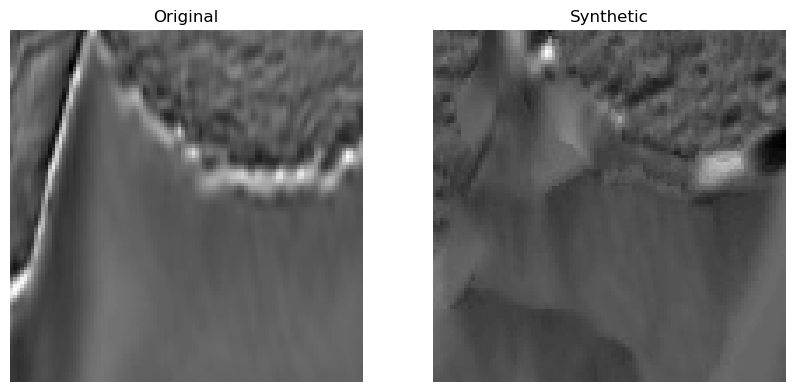

MSE: 702.7116949318694
Euclidean Distance: 0.43553540110588074
SSIM: 0.5197069453753913


In [ ]:
images = [imageA,imageB]
titles = ["Original","Synthetic"]
pm.showImages(images=images, imagesTitle=titles,size=(10,10)) 

# compute the MSE between the two images
m = mse(imageA, imageB)
# compute the SSIM between the two images
s = dssim(imageA, imageB)
# compute euclidean distance
euclidean_distance = lbp_distance(imageA, imageB)
print(f"MSE: {m}")
print(f"Euclidean Distance: {euclidean_distance}")
print(f"SSIM: {s}")

# Leitura de arquivo 

In [ ]:
import pandas as pd
import cv2
import numpy as np
from metrics import mse, dssim, lbp_distance
import suport.patchesMethods as pm
import os

In [128]:
#calcule valores mínimos, q1, q2, mediana, q3 e máximo
def statistics(listValues):
    min = np.min(listValues)
    q1 = np.percentile(listValues, 25)
    q2 = np.median(listValues)
    q3 = np.percentile(listValues, 75)
    max = np.max(listValues)
    print(f"   {min:.2f}, {q1:.2f}, {q2:.2f}, {q3:.2f}, {max:.2f}")
    #return min, q1, q2, q3, max
    

In [108]:
# Carregar o arquivo CSV com os caminhos das imagens
df_imgs = pd.read_csv('result\\sintese.csv', sep=';' , header=None)  # O CSV deve ter colunas, por exemplo: 'img1', 'img2'

In [140]:
#desenhar um bloxplot com os valores de mse, ssim e lbp_distance
import matplotlib.pyplot as plt
def boxplot(nomeOriginal, mse_values, ssim_values, lbp_distances):
    samples = len(mse_values)
    #titulo da figura
    plt.suptitle(f'{nomeOriginal} - {samples} samples', fontsize=16)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.boxplot(mse_values)
    plt.title('MSE ')
    plt.subplot(1, 3, 2)
    plt.boxplot(lbp_distances)
    plt.title('LBP Distance ')
    plt.subplot(1, 3, 3)
    plt.boxplot(ssim_values)
    plt.title('SSIM ')

   Min , Q1 , Median , Q3 , Max , Mean 
      MSE
      LBP Distance
      SSIM
Group: 0bdd44d530 - Images: 4
   1231.08, 1655.75, 2054.75, 2330.50, 2385.39
   0.35, 0.80, 1.00, 1.06, 1.08
   0.32, 0.34, 0.35, 0.37, 0.42
Group: 1d798aa5d5 - Images: 9
   563.84, 571.26, 596.85, 630.49, 734.40
   0.44, 0.46, 0.52, 0.54, 0.68
   0.41, 0.43, 0.44, 0.44, 0.46
Group: 1bd1c8c771 - Images: 6
   673.28, 709.74, 733.51, 755.88, 764.25
   0.44, 0.52, 0.55, 0.56, 0.58
   0.49, 0.49, 0.50, 0.52, 0.53
Group: 3ce657b8f7 - Images: 15
   992.93, 1069.72, 1088.30, 1127.21, 1171.50
   0.44, 0.45, 0.46, 0.47, 0.49
   0.39, 0.41, 0.42, 0.43, 0.46
Group: Total - Images: 34
   563.84, 680.64, 1013.46, 1114.23, 2385.39
   0.35, 0.46, 0.47, 0.55, 1.08
   0.32, 0.41, 0.43, 0.45, 0.53


<Figure size 640x480 with 0 Axes>

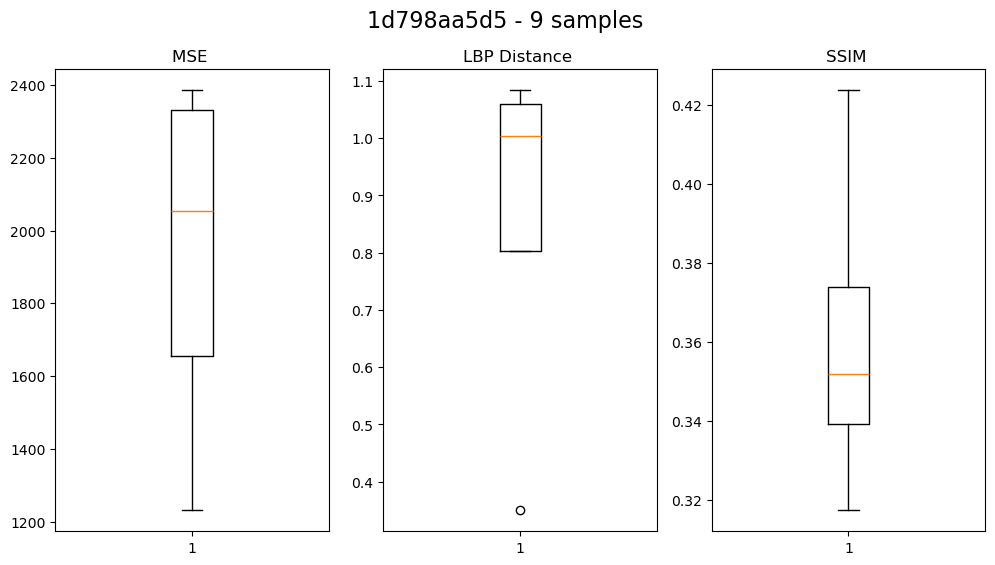

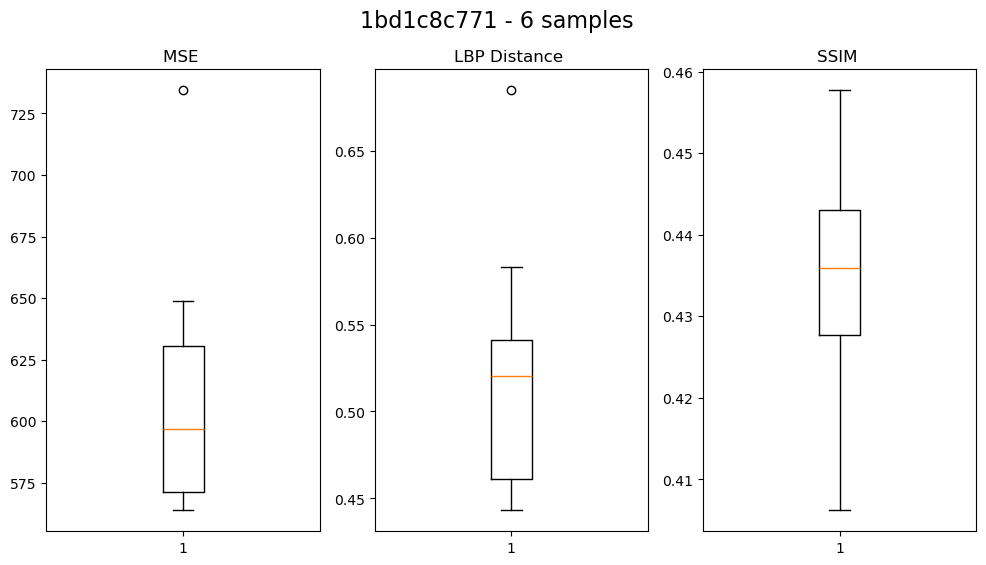

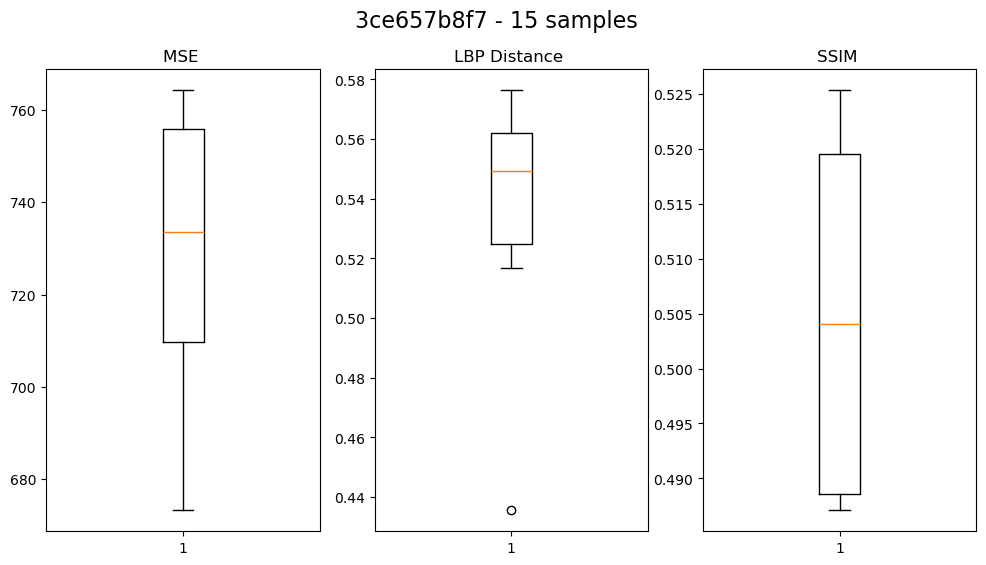

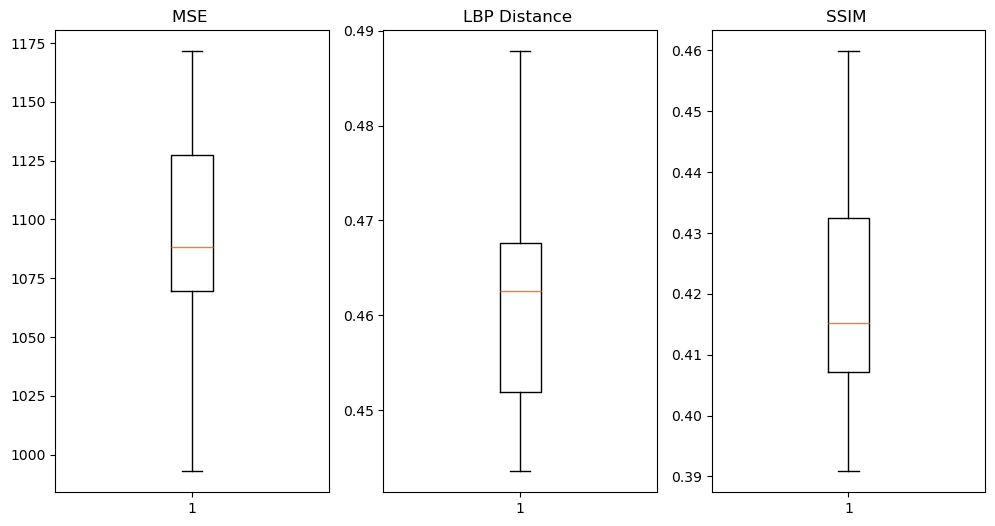

In [ ]:
imageA = 0
imageB = 0
mse_values = []
ssim_values = []
lbp_distances = []

mse_total = []
ssim_total = []
lbp_total = []

print(f"   Min , Q1 , Median , Q3 , Max , Mean ")
print(f"      MSE")
print(f"      LBP Distance")
print(f"      SSIM")

for i, row in df_imgs.iterrows():
    for j, value in enumerate(row):
        if pd.notnull(value):
            if j == 0:
                nomeOriginal = value
                original = f"tgs_salt\\{value}.png"
                # verifique se o arquivo existe amtes de tentar ler e avise de erro
                if not os.path.exists(original):
                    print(f"File not found: {original}")
                    continue
                imageA = cv2.imread(original,0)
            else:
                nomeImage = value
                sintese = f"result\\{value}.jpg"
                # verifique se o arquivo existe amtes de tentar ler e avise de erro
                if not os.path.exists(sintese):
                    print(f"File not found: {sintese}")
                    continue
                imageB = cv2.imread(sintese,0)
                mse_value = mse(imageA, imageB)
                s = dssim(imageA, imageB)
                euclidean_distance = lbp_distance(imageA, imageB)
                #print(f"MSE: {mse_value:.2f}, SSIM: {s:.2f}, LBPD: {euclidean_distance:.2f}")
                #images = [imageA, imageB]
                #titles = [nomeOriginal, nomeImage]
                #pm.showImages(images=images, imagesTitle=titles, size=(5,5))
                mse_values.append(mse_value)
                ssim_values.append(s)
                lbp_distances.append(euclidean_distance)
    # stats do grupo
    if len(mse_values) == 0:
        print(f"No images found for group: {nomeOriginal}")
        continue
    # Salvar mse_values, ssim_values, lbp_distances em um arquivo CSV separado por ponto e vírgula.
    print(f"Group: {nomeOriginal} - Images: {len(mse_values)}")

    boxplot(nomeOriginal, mse_values, ssim_values, lbp_distances)
    statistics(mse_values)
    statistics(lbp_distances)
    statistics(ssim_values)
 
    mse_total = mse_total + mse_values
    ssim_total = ssim_total + ssim_values   
    lbp_total = lbp_total + lbp_distances
    
    mse_values = []
    ssim_values = []
    lbp_distances = []
# stats do grupo
print(f"Group: Total - Images: {len(mse_total)}")
statistics(mse_total)
statistics(lbp_total)
statistics(ssim_total)
  


In [ ]:
# Salvar os valores mínimos, q1, mediana, q3 e máximo em um arquivo CSV separado por ponto e vírgula.
stats_df = pd.DataFrame({
    'MSE': statistics(mse_values),
    'SSIM': statistics(ssim_values),
    'LBP Distance': statistics(lbp_distances)
}, index=['Min', 'Q1', 'Q2', 'Q3', 'Max' , 'Mean']).T
stats_df.to_csv('result\\metrics_statistics.csv', sep=';', index=True, float_format='%.2f')
# Exibir os resultados  
print("Estatísticas salvas em 'result\\metrics_statistics.csv'.")

# Listar produção do dia


In [131]:
import os
import datetime

directory = "result"
hoje = datetime.date.today()
print (f"Hoje: {hoje}")

#lista arquivos do diretorio
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        #extract .jpg
        name = filename[:-4]
        file_path = os.path.join(directory, filename)
        creation_time = os.path.getctime(file_path)
        creation_date = datetime.datetime.fromtimestamp(creation_time).date()
        if creation_date == hoje:
            print(f"{name}",end=',')



Hoje: 2025-06-04
03b25c46,31cb9a63,3907e15c,45fbb077,53a6bdf7,57546e07,679a7b13,69ea4232,76534aaf,89cc6728,904de8e6,939581a4,94fa77aa,9522261b,9dd9bf98,a3d13cfb,db2c039e,e95e6237,e9e9bb1d,